### Warning
Please run the "Fetching Datasets" notebook before and create csv files corresponding to both BeerAdvocate and RateBeer ratings.txt.gz :)

In [1]:
import pandas as pd
import seaborn as sns
import os 
from functions import read_data
import re


In [2]:
COLUMNS_NAMES = ["count","beer_name","beer_id","brewery_name","brewery_id","style","abv","date","username","user_id","appearance","aroma","palate","taste","overall","rating","text","review"]

In [3]:
#Check all the RateBeer csvs are there where they should be
import os 
RB_csv_list = os.listdir("../data")
RB_csv_list.sort()
RB_csv_list = [csv for csv in RB_csv_list if ".csv" in csv and 'ratings' in csv and 'RateBeer' in csv]
print(RB_csv_list)

['RateBeer_ratings_part_0.csv', 'RateBeer_ratings_part_1.csv', 'RateBeer_ratings_part_10.csv', 'RateBeer_ratings_part_11.csv', 'RateBeer_ratings_part_12.csv', 'RateBeer_ratings_part_13.csv', 'RateBeer_ratings_part_14.csv', 'RateBeer_ratings_part_2.csv', 'RateBeer_ratings_part_3.csv', 'RateBeer_ratings_part_4.csv', 'RateBeer_ratings_part_5.csv', 'RateBeer_ratings_part_6.csv', 'RateBeer_ratings_part_7.csv', 'RateBeer_ratings_part_8.csv', 'RateBeer_ratings_part_9.csv']


In [4]:
#Check all the BeerAdvocate csvs are there where they should be
BA_csv_list = os.listdir("../data")
BA_csv_list.sort()
BA_csv_list = [csv for csv in BA_csv_list if ".csv" in csv and 'ratings' in csv and 'BeerAdvocate' in csv]
print(BA_csv_list)

['BeerAdvocate_ratings_part_0.csv', 'BeerAdvocate_ratings_part_1.csv', 'BeerAdvocate_ratings_part_10.csv', 'BeerAdvocate_ratings_part_11.csv', 'BeerAdvocate_ratings_part_12.csv', 'BeerAdvocate_ratings_part_13.csv', 'BeerAdvocate_ratings_part_14.csv', 'BeerAdvocate_ratings_part_15.csv', 'BeerAdvocate_ratings_part_16.csv', 'BeerAdvocate_ratings_part_2.csv', 'BeerAdvocate_ratings_part_3.csv', 'BeerAdvocate_ratings_part_4.csv', 'BeerAdvocate_ratings_part_5.csv', 'BeerAdvocate_ratings_part_6.csv', 'BeerAdvocate_ratings_part_7.csv', 'BeerAdvocate_ratings_part_8.csv', 'BeerAdvocate_ratings_part_9.csv']


In [5]:
def aggregate_ratings(dataframe):
    dataframe.fillna({'count_x':0,'count_y':0,'mean_rating_x':0,'mean_rating_y':0, "min_rating_x" : float('inf'),"max_rating_x": -float('inf'),"min_rating_y" : float('inf'),"max_rating_y": -float('inf')},inplace=True)    
    dataframe["count2"] = dataframe['count_x'] + dataframe['count_y']
    
    dataframe["min_rating"] =  dataframe[['min_rating_x','min_rating_y']].min(axis=1)
    dataframe['mean_rating'] = (dataframe['mean_rating_x']*dataframe['count_x'] + dataframe['mean_rating_y']*dataframe['count_y'])/dataframe["count2"]
    dataframe["max_rating"] =  dataframe[['max_rating_x','max_rating_y']].max(axis=1)
    dataframe["count"] = dataframe["count2"]
    dataframe.drop(columns=["min_rating_x","mean_rating_x","max_rating_x","count_x","min_rating_y","mean_rating_y","max_rating_y","count_y","count2"],inplace=True)
    return dataframe
def multiple_csv(dataframe,dataframe2):
    COLUMNS_NAMES = ["count","beer_name","beer_id","brewery_name","brewery_id","style","abv","date","username","user_id","appearance","aroma","palate","taste","overall","rating","text"]

    # 5 is the length of the aggregated df, if the incoming df has more than 5 columns, it was not aggregated yet.
    if len(dataframe.columns) > 5:
        dataframe.columns = COLUMNS_NAMES
        grouped = dataframe.groupby(by="user_id").agg({'rating': ['min','mean', 'max'], 'count': 'count'}).reset_index(level=[0])
        grouped.columns = ["user_id","min_rating","mean_rating","max_rating","count"]
    else :
        grouped = dataframe
        grouped.columns = ["user_id","min_rating","mean_rating","max_rating","count"]

    dataframe2.columns = COLUMNS_NAMES

    grouped2 = dataframe2.groupby(by="user_id").agg({'rating': ['min','mean', 'max'], 'count': 'count'}).reset_index(level=[0])
    
    grouped2.columns = ["user_id","min_rating","mean_rating","max_rating","count"]
    #print("-------")

    df = aggregate_ratings(pd.merge(grouped, grouped2, how="outer",on=['user_id']))
    #display(pd.merge(grouped, grouped2, how="outer",on=['user_id']))
    #display(df)
    #print("-------")

    return df
    #test1[["appearance" ,"aroma","palate","taste","overall"]]=test1[["appearance" ,"aroma","palate","taste","overall"]].apply(pd.to_numeric)


In [6]:
#change range to correspond to reality if you have not created the csvs with 500'000 columns.
BA_dataframe = pd.read_csv("../data/BeerAdvocate_ratings_part_0.csv")
for index in range(1,17):
    temp = pd.read_csv(f"../data/BeerAdvocate_ratings_part_{index}.csv")
    print(f"Aggregating csv {index}")
    BA_dataframe = multiple_csv(BA_dataframe,temp)


Aggregating csv 1
Aggregating csv 2
Aggregating csv 3
Aggregating csv 4
Aggregating csv 5
Aggregating csv 6
Aggregating csv 7
Aggregating csv 8
Aggregating csv 9
Aggregating csv 10
Aggregating csv 11
Aggregating csv 12
Aggregating csv 13
Aggregating csv 14
Aggregating csv 15
Aggregating csv 16


In [7]:
RB_dataframe = pd.read_csv("../data/RateBeer_ratings_part_0.csv")
for index in range(1,15):
    temp = pd.read_csv(f"../data/RateBeer_ratings_part_{index}.csv")
    print(f"Aggregating csv {index}")
    RB_dataframe = multiple_csv(RB_dataframe,temp)

Aggregating csv 1
Aggregating csv 2
Aggregating csv 3
Aggregating csv 4
Aggregating csv 5
Aggregating csv 6
Aggregating csv 7
Aggregating csv 8
Aggregating csv 9
Aggregating csv 10


/var/folders/76/nc56p_fj6gq8l_bh8nsg44kr0000gn/T/ipykernel_26013/3451791338.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f"../data/RateBeer_ratings_part_{index}.csv")


Aggregating csv 11


/var/folders/76/nc56p_fj6gq8l_bh8nsg44kr0000gn/T/ipykernel_26013/3451791338.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f"../data/RateBeer_ratings_part_{index}.csv")


Aggregating csv 12


/var/folders/76/nc56p_fj6gq8l_bh8nsg44kr0000gn/T/ipykernel_26013/3451791338.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f"../data/RateBeer_ratings_part_{index}.csv")


Aggregating csv 13
Aggregating csv 14


In [8]:
BA_dataframe

,user_id,min_rating,mean_rating,max_rating,count
0,2,1.9,3.773469,4.9,49.0
1,3,0.9,3.335349,4.7,215.0
2,7,1.5,3.715000,4.7,40.0
3,20,0.7,3.124242,4.6,33.0
4,39,0.5,3.255483,5.0,2307.0
...,...,...,...,...,...
70116,485107,2.8,3.166667,3.6,3.0
70117,485629,2.1,2.100000,2.1,1.0
70118,486020,3.2,3.200000,3.2,1.0
70119,486406,3.2,3.200000,3.2,1.0


In [ ]:
RB_dataframe

In [9]:
# Fetch csv with user data so we can get Country of origin:
BA_users_df = read_data.fetch_csv("../DATA/BeerAdvocate.tar","users")
BA_users_df = BA_users_df[BA_users_df["nbr_ratings"] >= 1].copy()
RB_users_df = read_data.fetch_csv("../DATA/RateBeer.tar","users")
RB_users_df = RB_users_df[RB_users_df["nbr_ratings"] >= 1].copy()

<AxesSubplot:xlabel='count', ylabel='Count'>

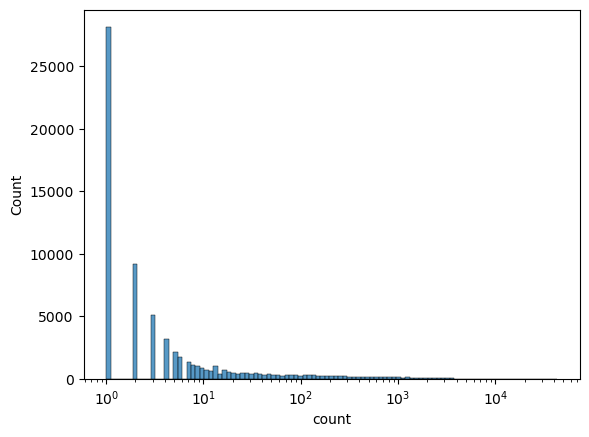

In [10]:
# Sanity check : are the histograms of the dataframe I created and the given dataset equal?
sns.histplot(data =RB_dataframe, x = "count",log_scale=True)

<AxesSubplot:xlabel='nbr_ratings', ylabel='Count'>

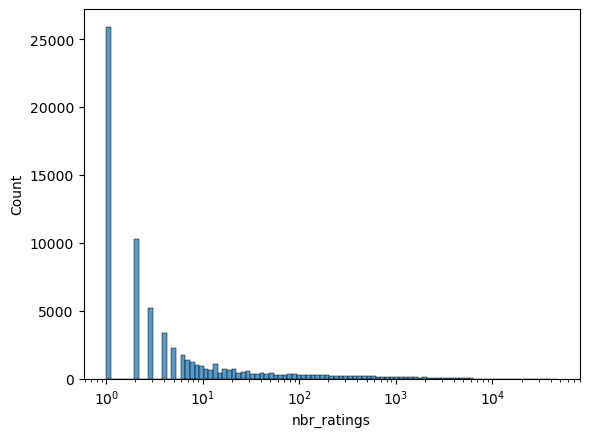

In [11]:
# Answer : Yes ! Change to BA to check other site, everything should be ok!
sns.histplot(data =RB_users_df, x = "nbr_ratings",log_scale=True)

In [12]:
BA_users_df.user_id=BA_users_df.user_id.str.strip()
BA_dataframe.user_id=BA_dataframe.user_id.str.strip()
BA_combined_df = pd.merge(BA_users_df, BA_dataframe, how="left",on=['user_id'])
BA_combined_df["user_id"] = BA_combined_df["user_id"].map(lambda x : re.search(r"[^.]+$",x)[0])
BA_combined_df["location"].fillna("Empty",inplace=True)
#mean aggregation in the next line is wrong, redo it
BA_countries = BA_combined_df.groupby('location').agg({'nbr_ratings': 'sum','min_rating':'min','mean_rating':'mean','max_rating':'max','count':'sum'})
display(BA_countries)


,nbr_ratings,min_rating,mean_rating,max_rating,count
location,,,,,
Afghanistan,12,1.00,3.476571,4.92,12.0
Albania,4,3.75,4.375000,4.75,4.0
American Samoa,20,2.18,4.139167,5.00,20.0
Andorra,8,4.00,4.421944,5.00,8.0
Angola,6,2.45,3.698333,4.38,6.0
...,...,...,...,...,...
Vanuatu,2,1.70,2.930000,4.16,2.0
Venezuela,1022,1.00,3.727309,5.00,1022.0
Vietnam,214,1.00,3.741715,5.00,214.0


In [13]:
RB_combined_df = pd.merge(RB_users_df, RB_dataframe, how="left",on=['user_id'])
RB_combined_df["location"].fillna("Empty",inplace=True)
#mean aggregation in the next line is wrong, redo it
RB_countries = RB_combined_df.groupby('location').agg({'nbr_ratings': 'sum','min_rating':'min','mean_rating':'mean','max_rating':'max','count':'sum'})
display(RB_countries)


,nbr_ratings,min_rating,mean_rating,max_rating,count
location,,,,,
Abkhazia,6,0.5,2.005556,5.0,6.0
Afghanistan,30,0.8,3.998958,5.0,23.0
Albania,7,1.0,2.833333,5.0,6.0
Algeria,39,1.2,2.936111,4.1,37.0
American Samoa,2,5.0,5.000000,5.0,1.0
...,...,...,...,...,...
Virgin Islands (U.S.),42,1.1,3.909556,5.0,39.0
Wales,1444,0.5,3.546926,5.0,1369.0
Yemen,2,0.5,0.550000,0.6,2.0
